In [1]:
from tokenizer import tokenize
from utils import load_clip_model, preprocess_image
from build_index import load_embeddings, transforms
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
model_id = 'ViT-H-14'
#img_encoder_path = f"./models/{model_id.replace('-', '_').lower()}_visual.xml"
txt_encoder_path = f"./models/{model_id.replace('-', '_').lower()}_text.xml"
device = 'GPU.1'
embeddings_path = "./data/vlm.pkl"

In [3]:
_, tenc = load_clip_model(None, txt_encoder_path, device)

In [4]:
ds = load_embeddings(embeddings_path)
index = ds.get_index('embedding')

In [24]:
tfeat

array([[-0.04944683,  0.04744382,  0.00282287, ...,  0.04775802,
        -0.03644691,  0.04822931]], dtype=float32)

In [67]:
%timeit _ = index.search(tfeat, 5)

4.43 ms ± 7.94 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%timeit _ = index.search(tfeat, 50)

4.36 ms ± 11 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
def search(text, k):
    tokens = tokenize(text)
    text_features = tenc.infer_new_request(tokens)
    tfeat = text_features.to_tuple()[0]
    tfeat /= np.linalg.norm(tfeat, axis=1, keepdims=True)
    _, indices = index.search(tfeat, k)
    images = []
    for i in map(int, indices):
        images.append(ds[i]['image'])
    return images

In [25]:
def show_pictures(imgs):
    fig = plt.figure(figsize=(12, 8))
    k = len(imgs)
    #f, axarr = plt.subplots(1, k)
    for i, img in enumerate(imgs):
        fig.add_subplot(2, k//2, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show(block=True)
    plt.close()

In [27]:
imgs = search('crash', 4)

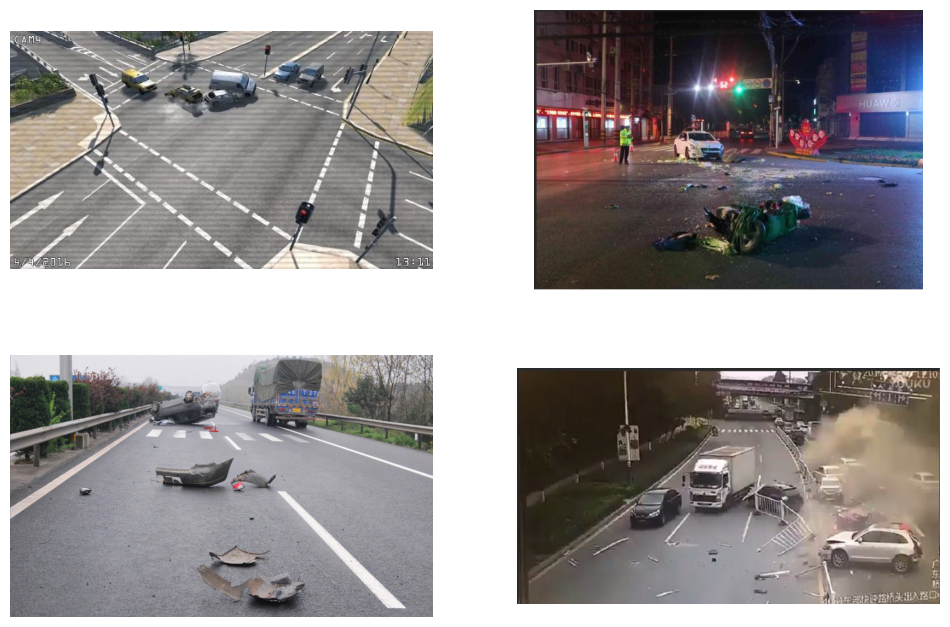

In [28]:
show_pictures(imgs)

In [29]:
imgs = search('minivan', 4)

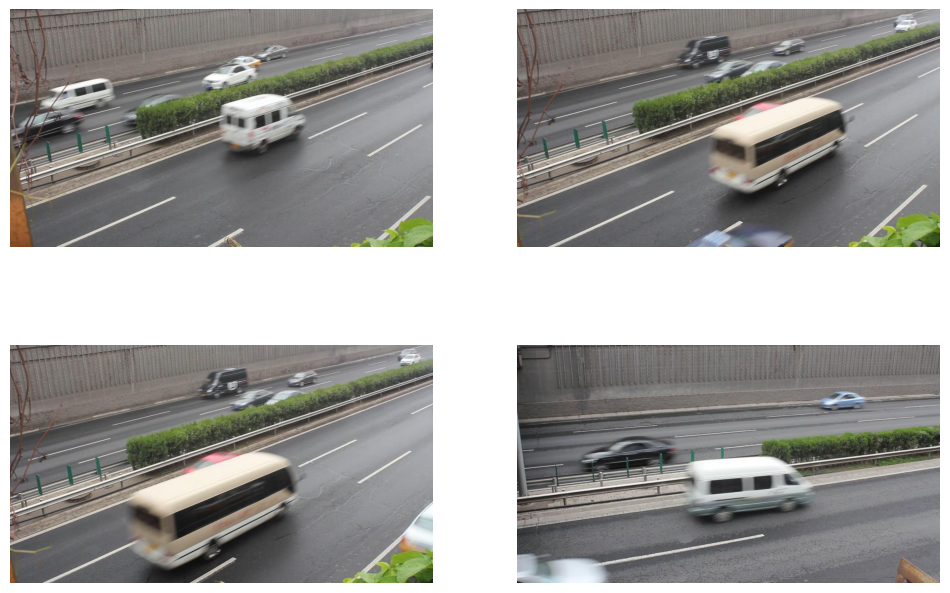

In [30]:
show_pictures(imgs)